<a href="https://colab.research.google.com/github/ocfurtado/projeto_modulo_01_ds_alura/blob/main/Notebooks/modulo01_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 01 - Bootcamp Data Science Alura - 2021

# Introdução


---


---




O objetivo deste projeto é mostrar quais Estados e Regiões do Brasil possuem o maior número de registros de óbitos nas unidades hospitalares participantes do SUS, no período de janeiro de 2008 a setembro de 2021.

Além disso, verificar a relação entre a população e o número total de óbitos de uma determinada região.

Por fim, inferir como a pandemia de COVID-19 impactou esses dados, tendo em vista a grande quantidade de pessoas que morreram por conta da doença.

---
Para essa análise, foram utilizados os dados disponibilizados pelo [DataSUS](https://datasus.saude.gov.br) no aplicativo Tabnet.

Os registros podem ser acessados pelo [Tabnet](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/) > Assistência à Saúde > Produção Hospitalar > "Dados Consolidados AIH (RD), por local de internação, a partir de 2008" > "Brasil por Região e Unidade da Federação"

Linha: Unidade da Federação

Coluna: Ano/mês processamento

Conteúdo: Óbitos

---



---




In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

In [ ]:
#Importando os dados do Github
url = 'https://raw.githubusercontent.com/ocfurtado/projeto_modulo_01_ds_alura/main/Dados/A165339189_28_143_208.csv'
dados = pd.read_csv(url, encoding='UTF-8', engine='python', sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',')

In [ ]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,358,450,480,414,295,270,366,446,427,812,736,645,533,392,350,304,40403
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,335,309,121,223,182,-,19785
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1338,1637,1898,1218,897,881,854,684,585,70213
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,299,210,168,180,188,190,156,13570
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2221,1528,1765,1197,1021,1084,1074,1182,1294,1557,2179,2502,1603,1280,1211,380,149137
5,16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,...,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,180,259,182,156,133,132,14047
6,17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,...,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,285,233,257,314,437,338,351,410,353,333,18,36949
7,21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,...,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1933,1491,1138,1051,1111,1063,859,1072,1169,1938,2003,1979,1682,1589,1258,1061,123248
8,22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,...,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,763,812,1037,1109,1101,898,808,579,81487
9,23 Ceará,548,1021,1142,1231,1144,1191,1254,1031,1077,1170,858,1057,1052,1204,1370,1200,1410,1167,1349,1200,1264,1178,1213,1105,1159,1257,1224,1278,1269,1172,1183,1229,1157,1155,1160,1165,1147,1223,1346,...,1541,1661,1578,1588,1555,1484,1673,1495,1620,1754,1803,1720,1719,1734,1617,1670,1607,1692,1740,1572,1621,1603,2451,2678,2217,227

In [ ]:
#'Setando' a coluna 'Unidade da Federação', como o index do Dataframe
dados.set_index('Unidade da Federação', inplace=True)

In [ ]:
#Verificando os tipos de dados que o Dataframe contém
# No caso, o método .info() mostra que, além de valores do tipo int64, temos outros 2 do tipo objects
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 166 entries, 2008/Jan to Total
dtypes: int64(164), object(2)
memory usage: 35.2+ KB


In [ ]:
#Verificando exatamente quais colunas do Dataframe são do tipo object
dados.select_dtypes(include=['object'])

,2009/Set,2021/Set
Unidade da Federação,,
11 Rondônia,112,304
12 Acre,-,-
13 Amazonas,315,585
14 Roraima,48,156
15 Pará,801,380
16 Amapá,82,132
17 Tocantins,210,18
21 Maranhão,434,1061
22 Piauí,266,579


In [ ]:
#Substituit '-''por NaN
dados = dados.replace('-', np.nan)

In [ ]:
#Transformar as colunas que snao do tipo object e int64 para float64
dados = dados.astype('float64')

In [ ]:
#Criar a variável numero_obito_totais que é o Dataframe ordenado pelos valores totais e em ordem crescente
numero_obitos_totais = dados.sort_values('Total', ascending=True)

In [ ]:
#Remove o número das Unidades da Federação, chamando a função remove_numero
for index_name in numero_obitos_totais.index:
  numero_obitos_totais.rename(index={index_name: remove_numero(index_name)}, inplace=True)



---


>A conclusão que podemos tirar do gráfico abaixo é que o **Estado de São Paulo** possui o maior número de óbitos no SUS.




---








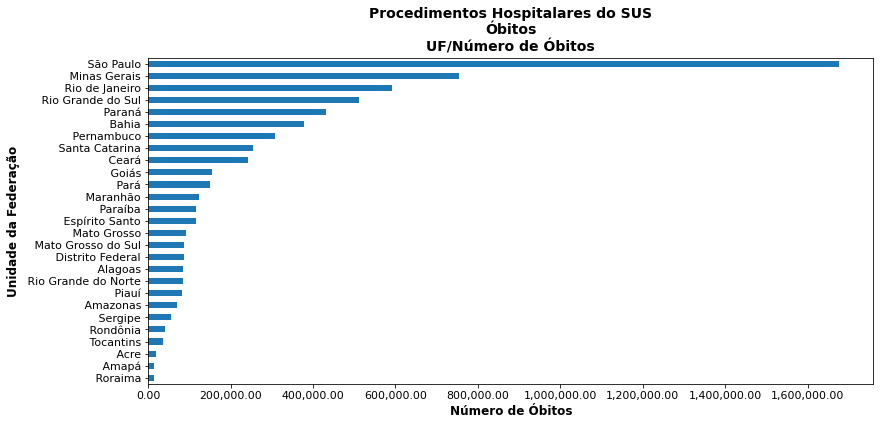

In [ ]:
#Plottando o gráfico
ax = numero_obitos_totais['Total'].plot.barh(figsize=(13,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Procedimentos Hospitalares do SUS\nÓbitos\nUF/Número de Óbitos', fontsize=14, fontweight='bold')
plt.xlabel('Número de Óbitos', fontsize=12, fontweight='bold')
plt.ylabel('Unidade da Federação', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.style.use('ggplot')

In [ ]:
#Cria uma variável para cada região e atribui a ela a soma da linha de cada Estado
#Como é feito um slice, cada variável receberá a soma total dos valores dos Estados que representam aquela região
regiao_norte = dados.iloc[:7, :].sum()
regiao_nordeste = dados.iloc[7:16, :].sum()
regiao_sudeste = dados.iloc[16:20, :].sum()
regiao_sul = dados.iloc[20:23, :].sum()
regiao_centro_oeste = dados.iloc[23:, :].sum()

In [ ]:
#Cria a variável colunas_utilizaveis que recebe as colunas do dataframe 'dados', na forma de lista
#Cria o dataframe 'dados_regiao' com os valores correspondente a cada região criada e as colunas da variável 'colunas_utilizaveis' 
#Cria, na posição 0, a coluna 'Região' com os nomes de cada uma
colunas_utilizaveis = dados.columns.tolist()
dados_regiao = pd.DataFrame([regiao_norte, regiao_nordeste, regiao_sudeste, regiao_sul, regiao_centro_oeste], columns=colunas_utilizaveis)
dados_regiao.insert(0, column='Região', value=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])

In [ ]:
#'Seta' a coluna 'Região' como index do dataframe 'dados_regiao'
dados_regiao.set_index('Região', inplace=True)

In [ ]:
#Cria a variável 'numero_obitos_totais_regiao' que recebe os dados do dataframe 'dados_regiao',
#ordenado pela coluna 'Total' e de maniera ascendente
numero_obitos_totais_regiao = dados_regiao.sort_values('Total', ascending=True)



---


> Se compararmos em termos de Região, podemos perceber que o Sudeste está em primeiro lugar, seguido pelo Nordeste e Sul, em relação ao número total de óbitos no SUS.

> O Centro-Oeste ocupa a quarta posição e, por último, temos o Norte.

---




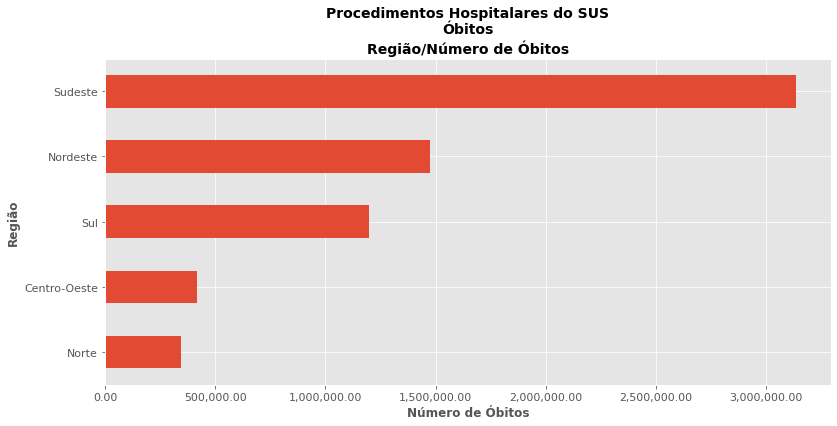

In [ ]:
#Plottando o gráfico
ax = numero_obitos_totais_regiao['Total'].plot.barh(figsize=(13,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Procedimentos Hospitalares do SUS\nÓbitos\nRegião/Número de Óbitos', fontsize=14, fontweight='bold')
plt.xlabel('Número de Óbitos', fontsize=12, fontweight='bold')
plt.ylabel('Região', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.style.use('ggplot')

In [ ]:
#Cria o dataframe 'dados_populacionais', com os valores totais das grandes regiões brasileiros
#Os dados são do último Censo Demográfico realizado pelo IBGE, no caso 2010
#Define a coluna 'Grande Região' com o index do dataframe.
dados_populacionais = pd.DataFrame({'Grande Região': ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'], 'Total':[15864454, 53081950, 80364410, 27386891, 14058094]})
dados_populacionais.set_index('Grande Região', inplace=True)



---


> Uma observação que se faz necessária é a de que as regiões Sudeste e Nordeste são as duas mais populosas do Brasil.

> Fato este que poderia esclarecer os valores mostrados no gráfico acima.

> O último censo realizado pelo [IBGE](https://sidra.ibge.gov.br/tabela/200#resultado), conforme gráfico que se segue, poderia confirmar essa conclusão.

---



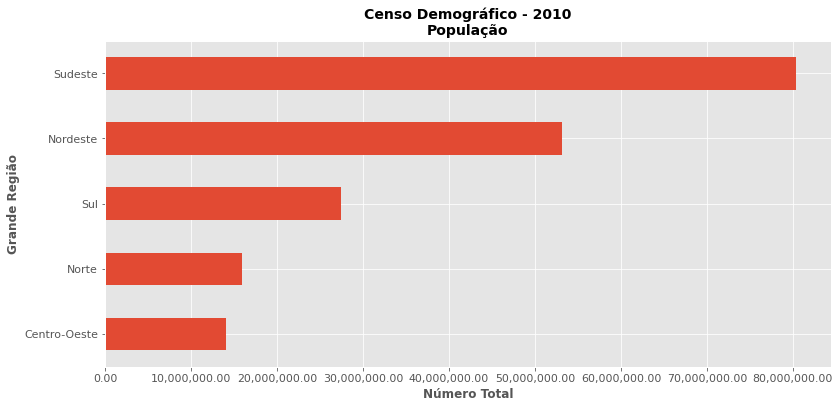

In [ ]:
#Plottando o gráfico
ax = dados_populacionais.sort_values('Total', ascending=True).plot.barh(figsize=(13,6), legend=False)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Censo Demográfico - 2010\nPopulação', fontsize=14, fontweight='bold')
plt.xlabel('Número Total', fontsize=12, fontweight='bold')
plt.ylabel('Grande Região', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.style.use('ggplot')

In [ ]:
#Cria uma novo dataframe, 'droppando' a coluna 'Total'
numero_obitos_regiao_tendencia = numero_obitos_totais_regiao.drop('Total', axis=1)

In [ ]:
#Cria um dataframe com um slice entre janeiro de 2008 e fevereiro de 2020
#Período antes da pandemia de covid19
antes_covid = numero_obitos_regiao_tendencia.loc[:, '2008/Jan':'2020/Fev']



---


> Uma outra análise que poderíamos fazer é inferir de que forma a pandemia de COVID-19 influenciou o número total de óbitos no SUS.

> Abaixo temos um gráfico que mostra que o número de óbitos tem uma tendência de alta, mas sem nenhum ponto muito expressivo.

> O período corresponde de janeiro de 2008 até o começo da pandemia, em fevereiro de 2020.


---



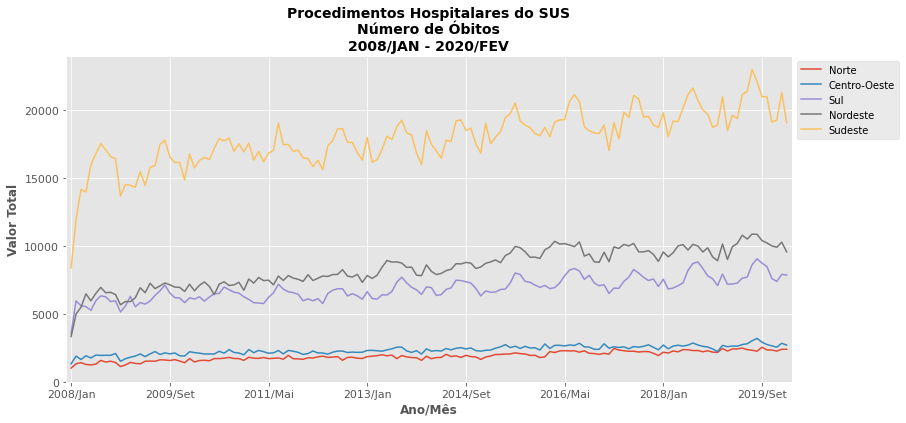

In [ ]:
#Plottando o gráfico
ax = antes_covid.T.plot(figsize=(13,6))
ax.legend(bbox_to_anchor=(1,0,0,1))
plt.title('Procedimentos Hospitalares do SUS\nNúmero de Óbitos\n2008/JAN - 2020/FEV', fontsize=14, fontweight='bold')
plt.xlabel('Ano/Mês', fontsize=12, fontweight='bold')
plt.ylabel('Valor Total', fontsize=12, fontweight='bold')
plt.ylim(0,24000)
plt.xlim(-1,146)
plt.tick_params(axis='both', labelsize=11)
plt.style.use('ggplot')



---


> É possível perceber que, a partir de março de 2020, começo da pandemia de COVID-19, o número de óbitos aumenta expressivamente.

---



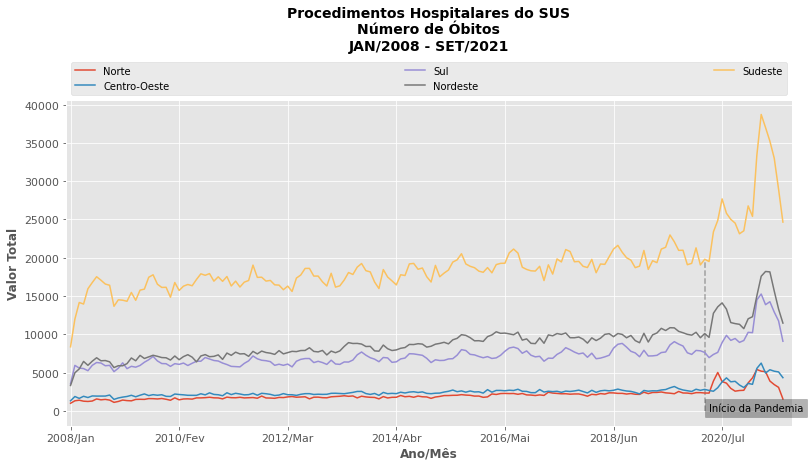

In [ ]:
#Plottando o gráfico
ax = numero_obitos_regiao_tendencia.T.plot(figsize=(13,6))
ax.legend(bbox_to_anchor=(0,1,1,0.2), loc='lower center', mode='expand', ncol=3)
plt.title('Procedimentos Hospitalares do SUS\nNúmero de Óbitos\nJAN/2008 - SET/2021', fontsize=14, fontweight='bold', pad=50)
plt.ylabel('Valor Total', fontsize=12, fontweight='bold')
plt.xlabel('Ano/Mês', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
# plt.ylim(0,40000)
plt.xlim(-1,166)
plt.text(147,0, 'Início da Pandemia', bbox=dict(facecolor='black', alpha=0.3, edgecolor='black'))
plt.vlines(x=146, ymin=0, ymax=19807, linestyles='dashed', alpha=0.3)
plt.style.use('ggplot')

In [ ]:
#Cria uma cópia do dataframe
numero_obitos_regiao_tendencia_total = numero_obitos_regiao_tendencia

In [ ]:
#Cria a linha 'Total', que contém o soma dos valores das colunas
numero_obitos_regiao_tendencia_total.loc['Total'] = numero_obitos_regiao_tendencia_total.sum()



---


> O pico de mortes por COVID-19 aconteceu no mês de março de 2021, totalizando [79.865](https://www.poder360.com.br/coronavirus/covid-apos-pico-numero-de-mortes-por-data-real-voltou-a-patamares-de-2020/) óbitos.


> Já o pico de óbitos no SUS, independentemente da causa, aconteceu em abril de 2021, totalizando 83.016 óbitos.

---



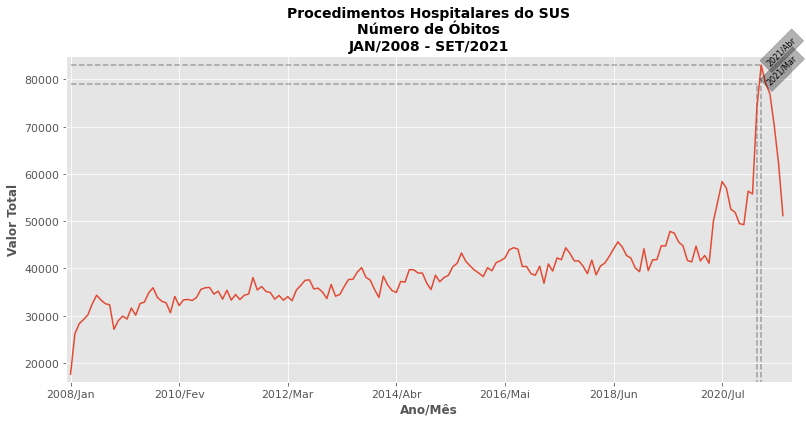

In [ ]:
#Plottando o gráfico
ax = numero_obitos_regiao_tendencia_total.loc['Total'].plot(figsize=(13,6))
plt.title('Procedimentos Hospitalares do SUS\nNúmero de Óbitos\nJAN/2008 - SET/2021', fontsize=14, fontweight='bold')
plt.ylabel('Valor Total', fontsize=12, fontweight='bold')
plt.xlabel('Ano/Mês', fontsize=12, fontweight='bold')
plt.tick_params(axis='both', labelsize=11)
plt.ylim(16000,85000)
plt.xlim(-1,166)
plt.text(160,83016, '2021/Abr', rotation=45, fontsize=8, bbox=dict(facecolor='black', alpha=0.3, edgecolor='black'))
plt.text(160,79000, '2021/Mar', rotation=45, fontsize=8, bbox=dict(facecolor='black', alpha=0.3, edgecolor='black'))
plt.vlines(x=[159,158], ymin=[0,0], ymax=[83016,79000], linestyles='dashed', alpha=0.3)
plt.hlines(y=[83016,79000], xmin=[0,0], xmax=[159,158], linestyles='dashed', alpha=0.3)
plt.style.use('ggplot')

# Funções

In [ ]:
def remove_numero(name):
  ###
  #O objetivo da função é receber uma string, encontrar dígitos nela por meio da RegEx re.sub()
  #e substituir por 'não-espaço'. Depois retorna essa string sem dígitos.
  ###
  return re.sub(r'[0-9]', '', name)

# Conclusão


---



---


Percebe-se que o Estado de São Paulo é o que possui o maior número de óbitos registrado nas unidades hospitalares participantes do SUS, no período de janeiro de 2008 a setembro de 2021.

Podemos inferir que essa fato está relacionado com o tamanho da população. Por possuir o maior do Brasil, seria natural que tivesse um maior número de óbitos. Afinal, mais pessoas utilizam o sistema do SUS.

Isso contribui para que a Região Sudeste esteja em 1º lugar no número total de óbitos. Fora que os 3 primeiros Estados com os maiores números compõem a citada Região, sendo eles: São Paulo, Rio de Janeiro e Minas Gerais.

---
Também é possível perceber que, apesar de dois Estados [Rio Grande do Sul e Paraná] da Região Sul ocuparem a 4º e a 5º posição no ranking das UFs, o Nordeste é que ocupa o 2º lugar no ranking geral das regiões.

Isso se justificaria, pelo fato do Nordeste ser a 2º região mais populosa, o que reforça a relação: quanto maior a população, maior o número de óbitos registrados.


---

O crescimento do número de óbitos nos hospitais do SUS, de 2008 até meados de 2020, seguiu aumentando, mas em um processo sem muita expressividade.

Entretando, a partir de fevereiro de 2020, período em que começou a pandemia, é possível verificar como o número de óbitos, em geral, saltou de maneira impressionante, impactando os meses seguintes. 


---

---







